## Chapter 5:  Exercise 5.3

Write a program to reproduce Figure 5.3 on page 145.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions_section_5 as fs5

np.random.seed(2)
X = np.random.uniform(low=0, high=1, size=50)
X.sort()

### Classes objects definition

In [6]:
linear_base = fs5.global_linear_base()
global_polinomial = fs5.global_polinomial_base()
cubic_base = fs5.cubic_spline_base(knots = np.array([0.33, 0.66]))
natural_base = fs5.natural_cubic_spline_base(np.linspace(0.1, 0.9, 6))

### Calculation pointwise Variance

In [8]:
H_1 = linear_base.generate_basis_matrix(X)
H_2 = global_polinomial.generate_basis_matrix(X)
H_3 = cubic_base.generate_basis_matrix(X)
H_4 = natural_base.generate_basis_matrix(X)

matrices = [H_1, H_2, H_3, H_4]
point_wise = list()

for m in matrices:
    W = np.linalg.inv(m.T @ m)
    point_wise.append(
        [row @ np.linalg.inv(m.T @ m) @ row for row in m]
    )

### Plot

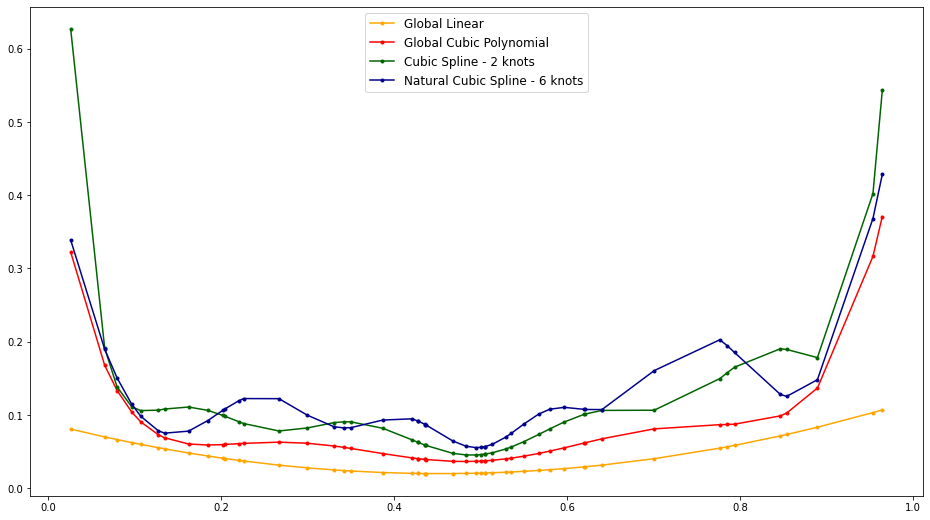

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))

kwargs = {'marker':'.'}
plt.plot(X, point_wise[0], label='Global Linear', color='orange', **kwargs)
plt.plot(X, point_wise[1], label='Global Cubic Polynomial', color='red', **kwargs)
plt.plot(X, point_wise[2], label='Cubic Spline - 2 knots', color='darkgreen', **kwargs)
plt.plot(X, point_wise[3], label='Natural Cubic Spline - 6 knots', color='darkblue', **kwargs)
plt.legend(fontsize=12, loc='upper center');